In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style='whitegrid')

In [3]:
matches = pd.read_csv('/content/matches (1).csv')
deliveries = pd.read_csv('/content/deliveries (2).csv')

In [4]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [6]:
matches.isnull().sum()

,0
id,0
season,0
city,7
date,0
team1,0
team2,0
toss_winner,0
toss_decision,0
result,0
dl_applied,0


In [7]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [8]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

In [9]:
deliveries.isnull().sum()

,0
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batsman,0
non_striker,0
bowler,0
is_super_over,0


/tmp/ipython-input-838297332.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='season', data=matches, palette='viridis')


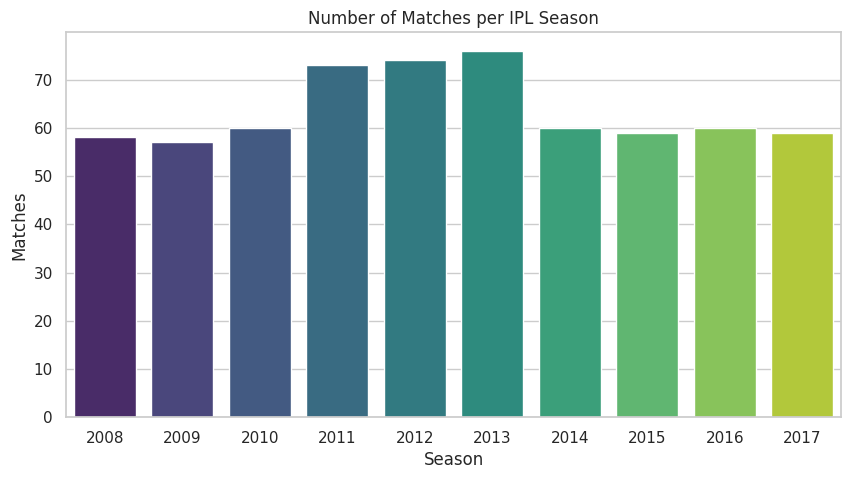

In [11]:
#Matches per season
plt.figure(figsize=(10,5))
sns.countplot(x='season', data=matches, palette='viridis')
plt.title('Number of Matches per IPL Season')
plt.xlabel('Season')
plt.ylabel('Matches')
plt.show()

/tmp/ipython-input-260110222.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_wins.values, y=team_wins.index, palette='rocket')


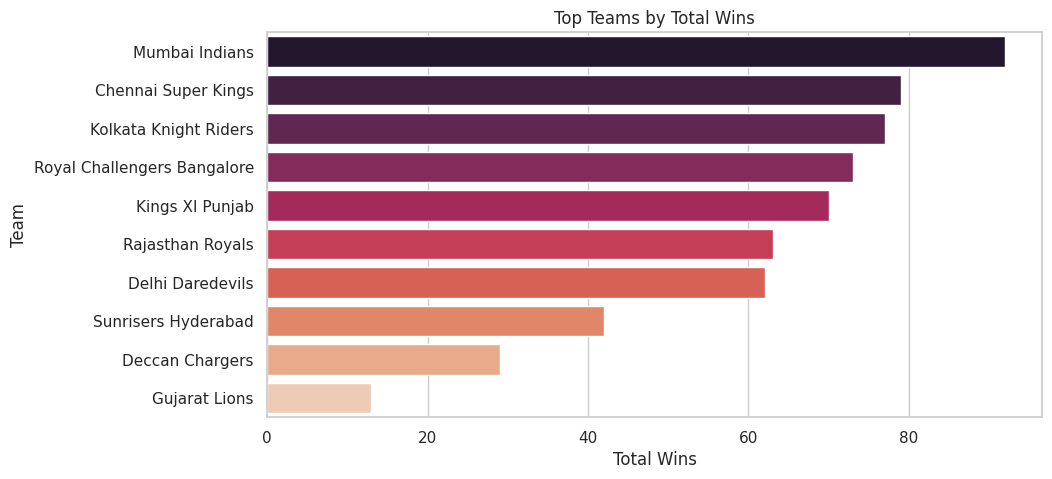

In [16]:
#Most successfull Teams
team_wins = matches['winner'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=team_wins.values, y=team_wins.index, palette='rocket')
plt.title('Top Teams by Total Wins')
plt.xlabel('Total Wins')
plt.ylabel('Team')
plt.show()


In [17]:
#Toss v/s Match Reasult
toss_match_win = (matches['toss_winner'] == matches['winner']).mean()
print(f"Toss winner also won the match in {toss_match_win*100:.2f}% cases")

Toss winner also won the match in 51.10% cases


/tmp/ipython-input-1065550377.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_venues.values, y=top_venues.index, palette='cool')


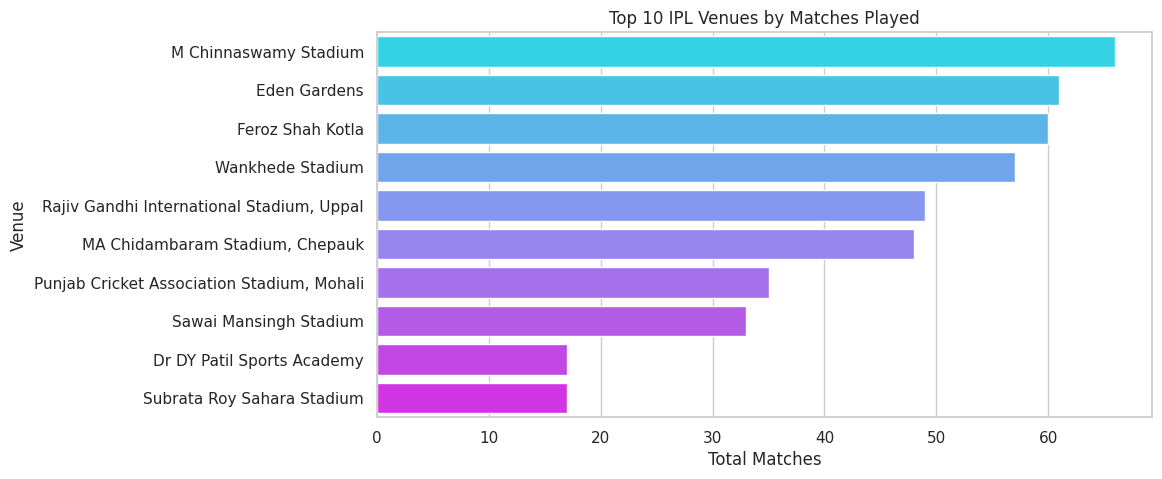

In [18]:
#Match results by Venue
top_venues = matches['venue'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_venues.values, y=top_venues.index, palette='cool')
plt.title('Top 10 IPL Venues by Matches Played')
plt.xlabel('Total Matches')
plt.ylabel('Venue')
plt.show()

/tmp/ipython-input-2921520513.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_batsmen.values, y=top_batsmen.index, palette='magma')


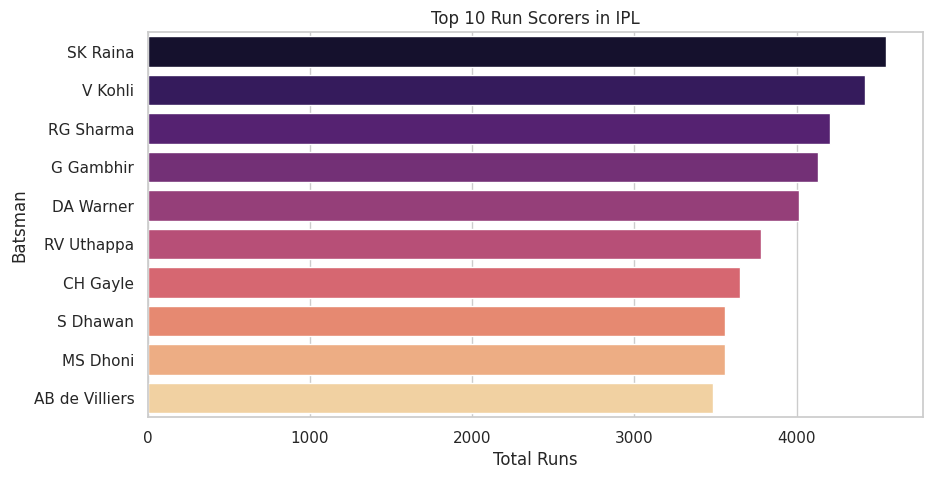

In [19]:
#Top Ten RunScores
top_batsmen = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_batsmen.values, y=top_batsmen.index, palette='magma')
plt.title('Top 10 Run Scorers in IPL')
plt.xlabel('Total Runs')
plt.ylabel('Batsman')
plt.show()

In [20]:
#Top 10 Wicket Takers
wickets = deliveries[deliveries['dismissal_kind'].notna()]
top_bowlers = wickets.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(10)

/tmp/ipython-input-618881395.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette='crest')


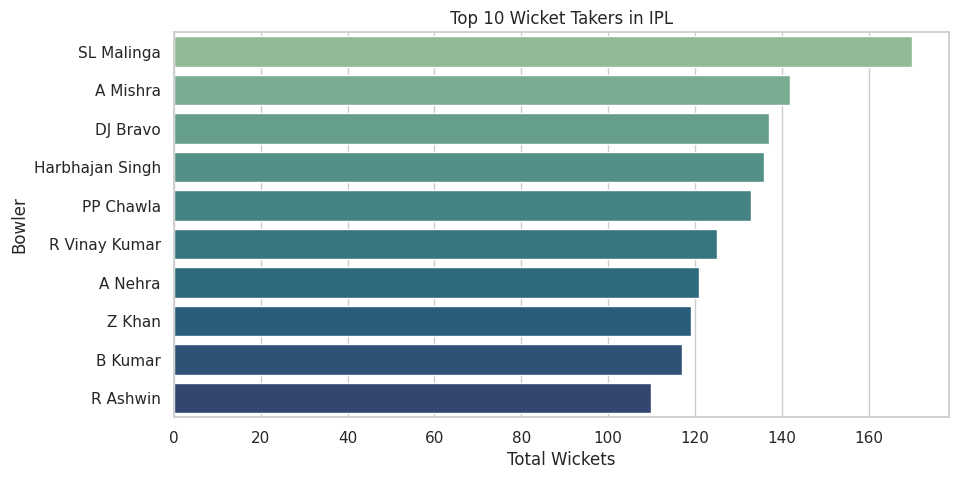

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette='crest')
plt.title('Top 10 Wicket Takers in IPL')
plt.xlabel('Total Wickets')
plt.ylabel('Bowler')
plt.show()

In [22]:
#Season Wise RunScored
season_runs = deliveries.groupby('match_id')['total_runs'].sum()
season_data = matches[['id','season']].merge(season_runs, left_on='id', right_on='match_id')
season_total = season_data.groupby('season')['total_runs'].sum()

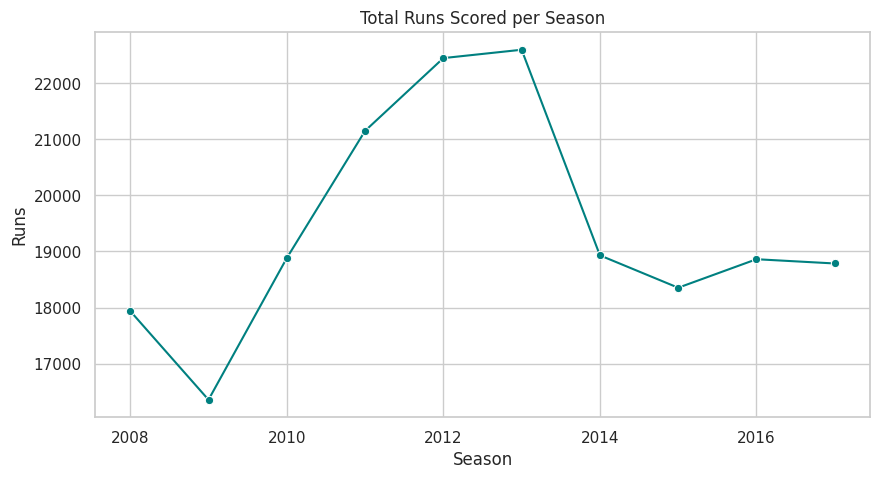

In [23]:
plt.figure(figsize=(10,5))
sns.lineplot(x=season_total.index, y=season_total.values, marker='o', color='teal')
plt.title('Total Runs Scored per Season')
plt.xlabel('Season')
plt.ylabel('Runs')
plt.show()

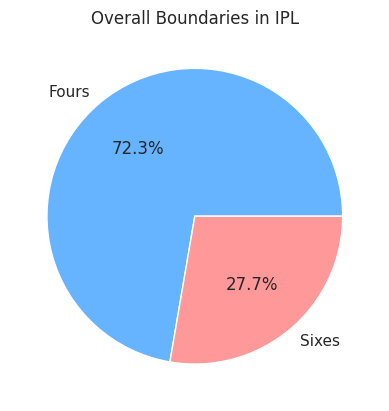

In [24]:
#Total 4s and 6s
fours = deliveries[deliveries['batsman_runs'] == 4].shape[0]
sixes = deliveries[deliveries['batsman_runs'] == 6].shape[0]
plt.pie([fours, sixes], labels=['Fours', 'Sixes'], autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title('Overall Boundaries in IPL')
plt.show()

In [26]:
print("✅ IPL EDA Key Findings:")
print("1️⃣ Most successful teams:", matches['winner'].value_counts().head(3).to_dict())
print(f"2️⃣ Toss winner also won in about {toss_match_win*100:.2f}% of matches")
print("3️⃣ Top run scorer:", top_batsmen.index[0])
print("4️⃣ Top wicket taker:", top_bowlers.index[0])
print("5️⃣ Highest runs scored season:", season_total.idxmax())

✅ IPL EDA Key Findings:
1️⃣ Most successful teams: {'Mumbai Indians': 92, 'Chennai Super Kings': 79, 'Kolkata Knight Riders': 77}
2️⃣ Toss winner also won in about 51.10% of matches
3️⃣ Top run scorer: SK Raina
4️⃣ Top wicket taker: SL Malinga
5️⃣ Highest runs scored season: 2013
